In this notebook we plot the results of the analysis in "Validation_zscores_clinvar.ipynb"
and "Validation_zscores_TCGA.ipynb" that are both under the co-trans code directory

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [1]:
def plot_significance(p_value: float) -> str:
    ''' 
    Defines the number of significance stars that need to be ploted above a given bar
    '''
    if p_value >= 10**-2:
        sign = ''
    elif (p_value < 10**-2) & (p_value >= 10**-10): # 10^-10<p<10^-2
        sign = "*"
    elif (p_value < 10**-10) & (p_value >= 10**-50): # 10^-50<p<10^-10
        sign = "**"
    else: # p<10^-50
        sign = "***" 
        
    return(sign)

## Clinvar variants - Figure 7a in the main paper

In [12]:
''' Obtain the data '''


mfe_1 = pd.read_pickle("../Results/validation/ClinVar/mfe_v_z_percentile1.pickle")
mfe_01 = pd.read_pickle("../Results/validation/ClinVar/mfe_v_z_percentile0.1.pickle")
mfe_5 = pd.read_pickle("../Results/validation/ClinVar/mfe_v_z_percentile5.pickle")


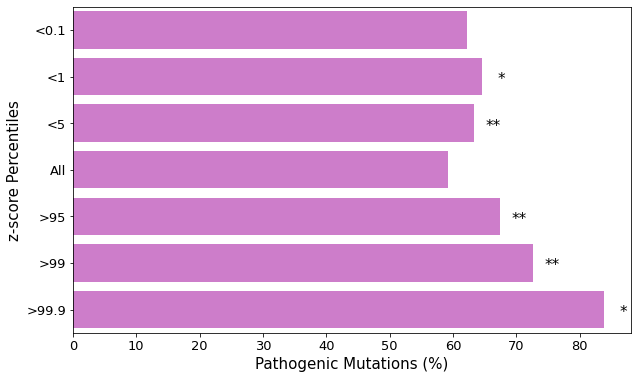

In [21]:
# Define the groups and corresponding data for measurements_1 and measurements_2
groups = ['<0.1', '<1', '<5', 'All', '>95', '>99', '>99.9'] # "for example, group "<1" contains the
#variants that are in the bottom 1 percent of z-scores out of all ClinVar variants

mfe_res = [mfe_01["ratios_df"].loc["Pathogenic", "ratio_low"], 
           mfe_1["ratios_df"].loc["Pathogenic", "ratio_low"], 
           mfe_5["ratios_df"].loc["Pathogenic", "ratio_low"],
           mfe_5["ratios_df"].loc["Pathogenic", "original"],
           mfe_5["ratios_df"].loc["Pathogenic", "ratio_high"],
           mfe_1["ratios_df"].loc["Pathogenic", "ratio_high"],
           mfe_01["ratios_df"].loc["Pathogenic", "ratio_high"]]

mfe_res = [res*100 for res in mfe_res] #change to percentanges

# Create a DataFrame for easier plotting
df = pd.DataFrame({'Group': groups , 
                   'Measure': ['MFE'] * len(groups),
                   'Percent of Pathogenic Mutations': mfe_res})

# Sort the DataFrame based on the specified order of groups
group_order = ['<0.1', '<1', '<5', 'All', '>95', '>99', '>99.9']
df['Group'] = pd.Categorical(df['Group'], categories=group_order, ordered=True)
df = df.sort_values('Group')

# Plotting
plt.figure(figsize=(10, 6))
colors = {'MFE': 'orchid'}
sns.barplot(x='Percent of Pathogenic Mutations', y='Group', hue='Measure', data=df, palette=colors)

# Change y-axis label
plt.ylabel('z-score Percentiles', size = 15)
plt.xlabel('Pathogenic Mutations (%)', size = 15)
plt.xticks(fontsize=13)  # Adjust fontsize as needed
plt.yticks(fontsize=13)  # Adjust fontsize as needed

# Remove legend
plt.legend().set_visible(False)

#significance: p<10^-2: (*), p<10^-10: (**), p<10^-50: (***). p values can be found in the variables uploaded in 
#the previous cell (''' Obtain the data ''')
margin = 3 #distance from the end of the bar to the ploting of the significance marker
plt.text(mfe_res[1] + margin, 1.05, plot_significance(mfe_01["low-p"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[1] + margin, 1.05, plot_significance(mfe_1["low-p"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[2] + margin, 2.05, plot_significance(mfe_5["low-p"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[4] + margin, 4.05, plot_significance(mfe_5["high-p"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[5] + margin, 5.05, plot_significance(mfe_1["high-p"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[6] + margin, 6.05, plot_significance(mfe_01["high-p"]), color='black', fontsize=15, ha='center', va='center')

plt.savefig('../Figures/clinvar_validation_mfe.png', dpi=300, bbox_inches='tight')


## TCGA variants, using 1000G - Figure 7b in the main paper

In [ ]:
''' Obtain the data '''

mfe_1 = pd.read_pickle("../Results/validation/TCGA/mfe_v_z_percentile1.pickle")
mfe_01 = pd.read_pickle("../Results/validation/TCGA/mfe_v_z_percentile0.1.pickle")
mfe_5 = pd.read_pickle("../Results/validation/TCGA/mfe_v_z_percentile5.pickle")


In [6]:
mfe_01["ratios_df"]

,Original,Percentile_low,Percentile_high
False,0.961816,0.981081,0.978619
True,0.038184,0.018919,0.021381


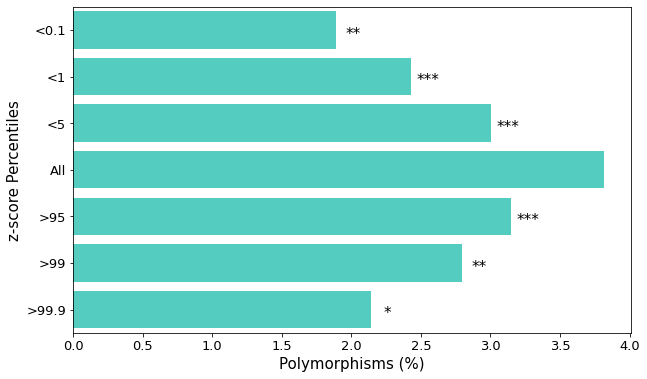

In [26]:
# Define the groups and corresponding data for measurements_1 and measurements_2
groups = ['<0.1', '<1', '<5', 'All', '>95', '>99', '>99.9']

mfe_res = [mfe_01["ratios_df"].loc[True, "Percentile_low"], 
           mfe_1["ratios_df"].loc[True, "Percentile_low"], 
           mfe_5["ratios_df"].loc[True, "Percentile_low"],
           mfe_5["ratios_df"].loc[True, "Original"],
           mfe_5["ratios_df"].loc[True, "Percentile_high"],
           mfe_1["ratios_df"].loc[True, "Percentile_high"],
           mfe_01["ratios_df"].loc[True, "Percentile_high"]]

mfe_res = [res*100 for res in mfe_res]

# Create a DataFrame for easier plotting
df = pd.DataFrame({'Group': groups , 
                   'Measure': ['MFE'] * len(groups),
                   'Percent of Polymorphisms': mfe_res})

# Sort the DataFrame based on the specified order of groups
group_order = ['<0.1', '<1', '<5', 'All', '>95', '>99', '>99.9']
df['Group'] = pd.Categorical(df['Group'], categories=group_order, ordered=True)
df = df.sort_values('Group')

# Plotting
plt.figure(figsize=(10, 6))
colors = {'MFE': 'turquoise'}
sns.barplot(x='Percent of Polymorphisms', y='Group', hue='Measure', data=df, palette=colors)

# Change y-axis label
plt.ylabel('z-score Percentiles', size = 15)
plt.xlabel('Polymorphisms (%)', size = 15)
plt.xticks(fontsize=13)  # Adjust fontsize as needed
plt.yticks(fontsize=13)  # Adjust fontsize as needed

# Remove legend
plt.legend().set_visible(False)

#significance: p<10^-2: (*), p<10^-10: (**), p<10^-50: (***). p values can be found in the variables uploaded in 
#the previous cell (''' Obtain the data ''')
margin = 0.12 #distance from the end of the bar to the ploting of the significance marker
plt.text(mfe_res[0] + margin, 0.08, plot_significance(mfe_01["p_low"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[1] + margin, 1.08, plot_significance(mfe_1["p_low"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[2] + margin, 2.08, plot_significance(mfe_5["p_low"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[4] + margin, 4.08, plot_significance(mfe_5["p_high"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[5] + margin, 5.08, plot_significance(mfe_1["p_high"]), color='black', fontsize=15, ha='center', va='center')
plt.text(mfe_res[6] + margin, 6.08, plot_significance(mfe_01["p_high"]), color='black', fontsize=15, ha='center', va='center')
plt.savefig('../Figures/TCGA_validation_mfe.png', dpi=300, bbox_inches='tight')
